# <center> Supprot Vector Machine </center>
## Professor: Victor Venites
## Data: 14/04/2020
## Aula: 07

## 1. Importando as Bibliotecas de Python
- E Verificando o Ambiente

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

- Print Working Directory

In [2]:
pwd

'C:\\Users\\VictorVenites\\Desktop\\Escola_Livre_de_IA\\2020.04.14_Aula07_Support_Vector_Machine'

- Minha Versão do Python
- Python 3.7.3

In [3]:
!python  --version

Python 3.7.3


## 2. Base de Dados OR
- Verdadeiro OU Falso

In [4]:
df_OR = pd.read_excel("OR.xlsx", index_col = "Lição")
df_OR

,Entrada_Um,Entrada_Dois,Saida_OR
Lição,,,
1,0,0,0
2,0,1,1
3,1,0,1
4,1,1,1


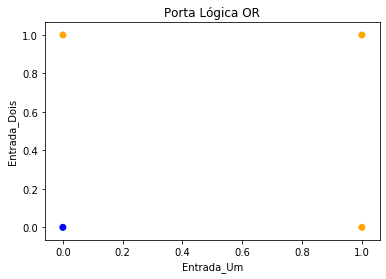

In [5]:
cores = ["blue", "orange", "orange", "orange"]
plt.scatter(df_OR["Entrada_Um"], df_OR["Entrada_Dois"], c = cores)
plt.title("Porta Lógica OR")
plt.xlabel("Entrada_Um")
plt.ylabel("Entrada_Dois")
plt.savefig("Gráfico_OR.jpg")
plt.show()

## 3. Base de Dados AND
- Verdadeiro E Falso

In [6]:
df_AND = pd.read_excel("AND.xlsx", index_col = "Lição")
df_AND

,Entrada_Um,Entrada_Dois,Saida_AND
Lição,,,
1,0,0,0
2,0,1,0
3,1,0,0
4,1,1,1


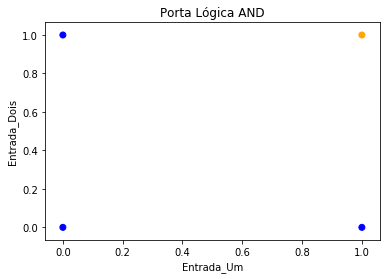

In [7]:
cores = ["blue", "blue", "blue", "orange"]
plt.scatter(df_AND["Entrada_Um"], df_AND["Entrada_Dois"], c = cores)
plt.title("Porta Lógica AND")
plt.xlabel("Entrada_Um")
plt.ylabel("Entrada_Dois")
plt.savefig("Gráfico_AND.jpg")
plt.show()

## 4. Vamos Criar Nosso "BigData" de XOR

In [8]:
Entrada_Um = [0, 0, 1, 1]
Entrada_Dois = [0, 1, 0, 1]
Saida_XOR = [0, 1, 1, 0]
Colunas = ["Entrada_Um", "Entrada_Dois", "Saida_XOR"]
Indice = [1, 2, 3, 4]

In [9]:
df_XOR = pd.DataFrame([], columns = Colunas, index = Indice)
df_XOR

,Entrada_Um,Entrada_Dois,Saida_XOR
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [10]:
df_XOR["Entrada_Um"] = Entrada_Um
df_XOR["Entrada_Dois"] = Entrada_Dois
df_XOR["Saida_XOR"] = Saida_XOR
df_XOR

,Entrada_Um,Entrada_Dois,Saida_XOR
1,0,0,0
2,0,1,1
3,1,0,1
4,1,1,0


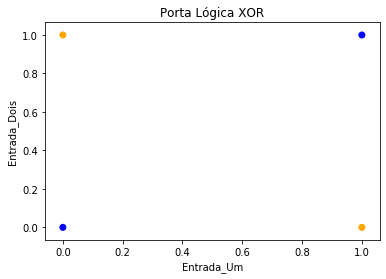

In [11]:
cores = ["blue", "orange", "orange", "blue"]
plt.scatter(df_XOR["Entrada_Um"], df_XOR["Entrada_Dois"], c = cores)
plt.title("Porta Lógica XOR")
plt.xlabel("Entrada_Um")
plt.ylabel("Entrada_Dois")
plt.savefig("Gráfico_XOR.jpg")
plt.show()

## 5. Modelo Support Vector Machine
- Machina de Vetor de Suporte

In [ ]:
df_OR

### 5.2. Versão do SkLearn

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

#### 5.2.1. Classificando OR

In [13]:
X_OR = df_OR.iloc[:, 0:-1]
y_OR = df_OR.iloc[:, -1]
y_OR

Lição
1    0
2    1
3    1
4    1
Name: Saida_OR, dtype: int64

In [14]:
svm_clf_OR = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 0.5, loss = "hinge", penalty='l2')),
])
svm_clf_OR.fit(X_OR, y_OR)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=0.5, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

#### 5.2.1.1. Resultados OR

In [15]:
svm_clf_OR.predict([[0, 0]])

array([0], dtype=int64)

In [16]:
svm_clf_OR.predict([[0, 1]])

array([1], dtype=int64)

In [17]:
svm_clf_OR.predict([[1, 0]])

array([1], dtype=int64)

In [18]:
svm_clf_OR.predict([[1, 1]])

array([1], dtype=int64)

#### 5.2.1.2. Matriz de Confusão
- A função consider os rótulos na ordem de chegada

In [19]:
Predicao_OR = svm_clf_OR.predict(X_OR)
confusion_matrix(y_OR, Predicao_OR)

array([[1, 0],
       [0, 3]], dtype=int64)

In [20]:
df_OR_Predicao = df_OR.copy()
df_OR_Predicao["Predicao"] = Predicao_OR
df_OR_Predicao

,Entrada_Um,Entrada_Dois,Saida_OR,Predicao
Lição,,,,
1,0,0,0,0
2,0,1,1,1
3,1,0,1,1
4,1,1,1,1


#### 5.2.1.1. Plotando o Vetor de Suporte
- mlxtend
- Pacote para imprimir Gráficos de Classificação bonitos, tipo nos livros
- Herda do MatPlotLib

In [21]:
!pip install mlxtend

In [22]:
from mlxtend.plotting import plot_decision_regions

Text(0.5, 1.0, 'Fronteira Separadora do SVM para OR')

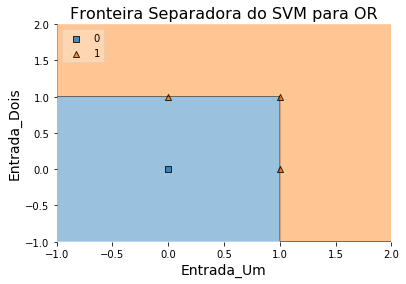

In [23]:
Parametros_Plot_mlxtend = {"X" : X_OR.values ,
                           "y" : y_OR.values ,
                           "clf" : svm_clf_OR ,
                           "legend" : 2
                          }
plot_decision_regions(**Parametros_Plot_mlxtend)
plt.xlabel(X_OR.columns[0], size=14)
plt.ylabel(X_OR.columns[1], size=14)
plt.title('Fronteira Separadora do SVM para OR', size=16)

### 5.2.2. Classificando AND

In [24]:
X_AND = df_AND.iloc[:, 0:-1]
y_AND = df_AND.iloc[:, -1]
svm_clf_AND = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss = "hinge", penalty='l2')),
])
svm_clf_AND.fit(X_AND, y_AND)
Predicao_AND = svm_clf_AND.predict(X_AND)
confusion_matrix(y_AND, Predicao_AND)

array([[3, 0],
       [0, 1]], dtype=int64)

#### 5.2.2.1. Plotando o Vetor de Suporte

Text(0.5, 1.0, 'Fronteira Separadora do SVM para AND')

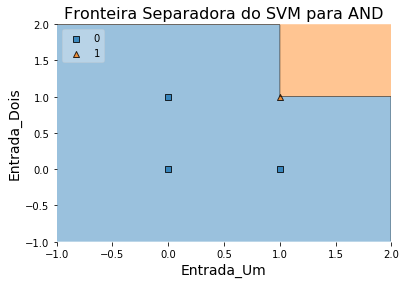

In [25]:
Parametros_Plot_mlxtend = {"X" : X_AND.values ,
                           "y" : y_AND.values ,
                           "clf" : svm_clf_AND ,
                           "legend" : 2
                          }
plot_decision_regions(**Parametros_Plot_mlxtend)
plt.xlabel(X_AND.columns[0], size=14)
plt.ylabel(X_AND.columns[1], size=14)
plt.title('Fronteira Separadora do SVM para AND', size=16)

### 5.2.3. Classificando XOR

In [26]:
X_XOR = df_XOR.iloc[:, 0:-1]
y_XOR = df_XOR.iloc[:, -1]
svm_clf_XOR = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss = "squared_hinge", penalty='l2')),
])
svm_clf_XOR.fit(X_XOR, y_XOR)
Predito_XOR = svm_clf_XOR.predict(X_XOR)
Predito_XOR

array([1, 1, 1, 1], dtype=int64)

- Por que não deu certo acima?

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [28]:
X_XOR = df_XOR.iloc[:, 0:-1]
y_XOR = df_XOR.iloc[:, -1]
svm_clf_XOR = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 2)),
    ("linear_svc", LinearSVC(C = 1, loss = "squared_hinge", penalty='l2', )),
])
svm_clf_XOR.fit(X_XOR, y_XOR)
Predito_XOR = svm_clf_XOR.predict(X_XOR)
confusion_matrix(y_XOR, Predito_XOR)

array([[2, 0],
       [0, 2]], dtype=int64)

In [29]:
df_XOR_Resultado = df_XOR.copy()
df_XOR_Resultado["Predito_XOR"] = Predito_XOR
df_XOR_Resultado

,Entrada_Um,Entrada_Dois,Saida_XOR,Predito_XOR
1,0,0,0,0
2,0,1,1,1
3,1,0,1,1
4,1,1,0,0


#### 5.2.3.1. Plotando o Vetor de Suporte

Text(0.5, 1.0, 'Fronteira Separadora do SVM para XOR')

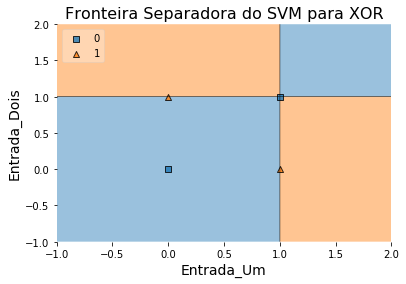

In [30]:
Parametros_Plot_mlxtend = {"X" : X_XOR.values ,
                           "y" : y_XOR.values ,
                           "clf" : svm_clf_XOR ,
                           "legend" : 2
                          }
plot_decision_regions(**Parametros_Plot_mlxtend)
plt.xlabel(X_XOR.columns[0], size=14)
plt.ylabel(X_XOR.columns[1], size=14)
plt.title('Fronteira Separadora do SVM para XOR', size=16)

### 5.2.4. Classificando Tipos de Cancer

In [31]:
df_Cancer = pd.read_excel("breastCancer.xlsx", index_col = "id")
df_Cancer.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
id,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [32]:
X_Cancer = df_Cancer.iloc[:, 0:-1]
y_Cancer = df_Cancer.iloc[:, -1]
svm_clf_Cancer = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss = "hinge", penalty='l2', max_iter = 1000)),
])
svm_clf_Cancer.fit(X_Cancer, y_Cancer)
Predicao_Cancer = svm_clf_Cancer.predict(X_Cancer)
confusion_matrix(y_Cancer, Predicao_Cancer)

array([[432,  12],
       [  7, 232]], dtype=int64)

In [33]:
df_Cancer_Resultado = df_Cancer.copy()
df_Cancer_Resultado["Predicao_Cancer"] = Predicao_Cancer
df_Cancer_Resultado.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class,Predicao_Cancer
id,,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2,2
1002945,5,4,4,5,7,10,3,2,1,2,4
1015425,3,1,1,1,2,2,3,1,1,2,2
1016277,6,8,8,1,3,4,3,7,1,2,4
1017023,4,1,1,3,2,1,3,1,1,2,2


In [35]:
from sklearn.metrics import accuracy_score

In [38]:
Acuracia_Cancer = accuracy_score(y_Cancer, Predicao_Cancer)
Acuracia_Cancer = round(Acuracia_Cancer * 100, 2)
Acuracia_Cancer

97.22

C:\Users\VictorVenites\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:247: UserWarning: No contour levels were found within the data range.
  antialiased=True)


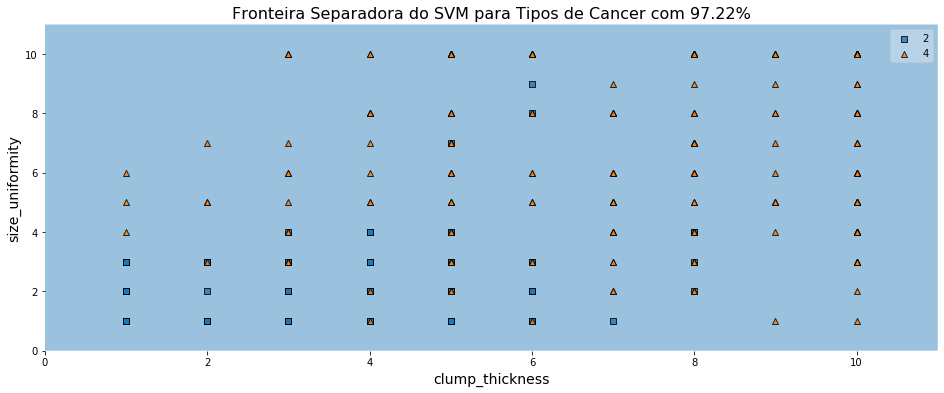

In [41]:
valor = 10
plt.figure(figsize = (16, 6))
Parametros_Plot_mlxtend = {"X" : X_Cancer.values,
                           "y" : y_Cancer.values,
                           "clf" : svm_clf_Cancer,
                           "filler_feature_values" : {2: valor, 3: valor, 4: valor, 5: valor, 6: valor, 7: valor, 8: valor},
                           "filler_feature_ranges" : {2: valor, 3: valor, 4: valor, 5: valor, 6: valor, 7: valor, 8: valor}
                          }
plot_decision_regions(**Parametros_Plot_mlxtend)
plt.xlabel(X_Cancer.columns[0], size = 14)
plt.ylabel(X_Cancer.columns[1], size = 14)
plt.title(f'Fronteira Separadora do SVM para Tipos de Cancer com {Acuracia_Cancer}%', size = 16)
plt.show()